In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

# for accuracy and loss graph
import matplotlib.pyplot as plt

In [2]:
keras.__version__

'2.4.3'

In [6]:

train_data_path = (r"...\train")
validation_data_path = (r"..\val")

In [7]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [8]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [9]:
# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 1951 images belonging to 4 classes.


In [10]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [11]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 324 images belonging to 4 classes.


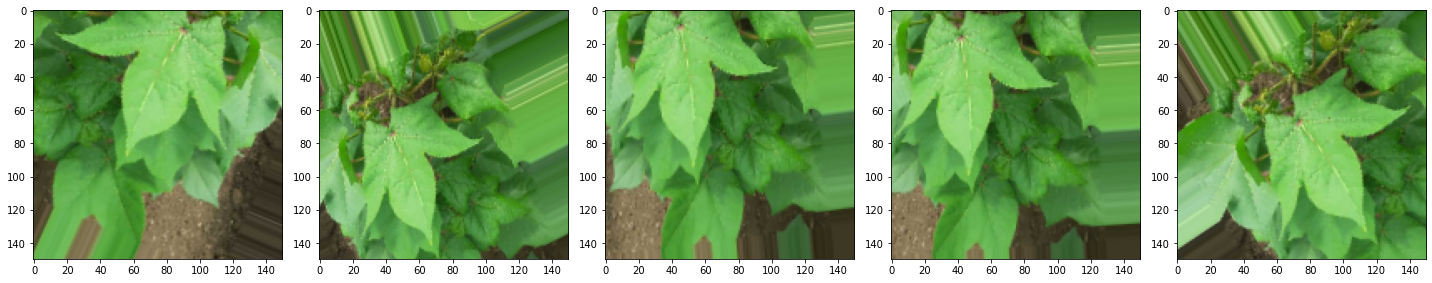

In [12]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [17]:
# save best model using vall accuracy
model_path = (r"C:\Users\HP\Desktop\iot project\v4_pred_cott_dis.h5")
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [18]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])


# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [20]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=500, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 16.06

Epoch 1/500
61/61 [==============================] - 89s 1s/step - loss: 1.2874 - accuracy: 0.4265 - val_loss: 1.0811 - val_accuracy: 0.4568

Epoch 00001: val_accuracy improved from -inf to 0.45679, saving model to C:\Users\HP\Desktop\iot project\v4_pred_cott_dis.h5
Epoch 2/500
61/61 [==============================] - 76s 1s/step - loss: 1.1095 - accuracy: 0.5223 - val_loss: 0.9941 - val_accuracy: 0.5093

Epoch 00002: val_accuracy improved from 0.45679 to 0.50926, saving model to C:\Users\HP\Desktop\iot project\v4_pred_cott_dis.h5
Epoch 3/500
61/61 [==============================] - 69s 1s/step - loss: 0.9774 - accuracy: 0.5942 - val_loss: 0.9988 - val_accuracy: 0.5340

Epoch 00003: val_accuracy improved from 0.50926 to 0.53395, saving model to C:\Users\HP\Desktop\iot project\v4_pred_cott_dis.h5
Epoch 4/500
61/61 [==============================] - 66s 1s/step - loss: 0.8877 - accuracy: 0.6490 - val_loss: 0.8583 - val_accuracy: 0.6327

Epoch 00004: val_accuracy improved from 0.53395 to 

In [23]:

model_path2 = (r'C:\Users\HP\Desktop\iot project\v4_1_pred_cott_dis.h5')
cnn_model.save(model_path2)

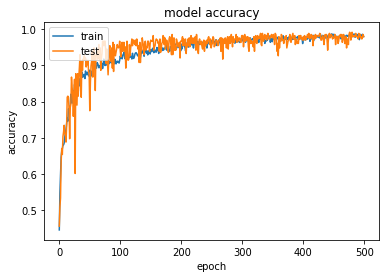

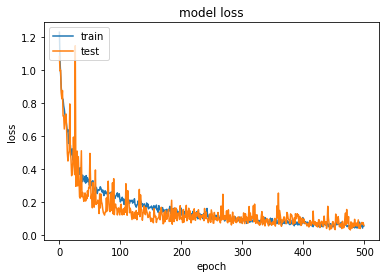

In [24]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
history.history

{'loss': [1.2284520864486694,
  1.0532217025756836,
  0.9670990109443665,
  0.892720103263855,
  0.849854052066803,
  0.824123203754425,
  0.8215170502662659,
  0.7821376323699951,
  0.7614832520484924,
  0.7300215363502502,
  0.7050076723098755,
  0.6885096430778503,
  0.6595892310142517,
  0.6265355944633484,
  0.6378752589225769,
  0.5552669167518616,
  0.5773762464523315,
  0.5278069376945496,
  0.5427043437957764,
  0.48471298813819885,
  0.4869353771209717,
  0.521514892578125,
  0.458821177482605,
  0.4511072635650635,
  0.470636248588562,
  0.4079777002334595,
  0.4287697374820709,
  0.37226635217666626,
  0.4239843189716339,
  0.43217232823371887,
  0.4027045667171478,
  0.38701528310775757,
  0.389644593000412,
  0.3668724298477173,
  0.40739819407463074,
  0.3586370050907135,
  0.34667643904685974,
  0.3215634822845459,
  0.3622770309448242,
  0.33844199776649475,
  0.33907634019851685,
  0.32303568720817566,
  0.3546392321586609,
  0.31367796659469604,
  0.35950514674186707